In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import img_as_float
from skimage.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
import skimage.io
import os
import numpy as np
import cv2

In [3]:
def wavelet(path, noisy_level):
    """
    This function apply wavelet method to images
    :param path: Original Images Path
    :param noisy_level: Noise level
    :return:
    """
    for e, i in enumerate(os.listdir(path)):
        if e == 0:
            filename = i.split(".")[0] + ".png"

            # Original Image
            original = skimage.io.imread(path + filename)
            original = img_as_float(original)

            # Given Noisy image with noisy level
            noisy = skimage.io.imread("images/" + noisy_level + "/" + filename)
            noisy = img_as_float(noisy)

            # Calculate the average standard deviation of noise across all colour channels.
            sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)

            # Perform wavelet denoising on an image with bayesShrink method.
            # Using the coif5 here for smoothing
            # wavelet = we are using coif5 but we can also use other available.
            bayesShrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                          method='BayesShrink', mode='soft', wavelet_levels=3, wavelet="coif5",
                                          rescale_sigma=True)

            # Perform wavelet denoising on an image with visuShrink method.
            # Visushrink is better to reduce the noise but it is over smoothing the result that
            # can be avoid using by apply factors value like 2, 3, 4..
            # wavelet = we are using coif5 but we can also use other available.
            visuShrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                         method='VisuShrink', mode='soft', wavelet="coif5", wavelet_levels=3,
                                         sigma=sigma_est / 2, rescale_sigma=True)

            # Combine all displaying images to gather
            all_filtered_images = [original, noisy, bayesShrink, visuShrink]

            # Plot four images to gather and pre define labels for it
            all_filter_image_labels = ["Original", "Noisy", "Wavelet denoising with bayesShrink",
                                       "Wavelet denoising with visuShrink"]
            plt.figure(figsize=(16, 12))
            psnr_result = 0
            for i, image in enumerate(all_filtered_images):
                mse_result = np.mean(((original * 255).astype(np.uint8) - (image * 255).astype(np.uint8)) ** 2).astype(np.uint8)
                ssim_index = ssim((original * 255).astype(np.uint8), (image * 255).astype(np.uint8), data_range=(image * 255).astype(np.uint8).max() - (image * 255).astype(np.uint8).min(), multichannel=True)
                plt.subplot(2, 2, i + 1)
                plt.xticks([])
                plt.yticks([])
                plt.title(
                    '{0} \n MSE = {1} \n SSIM Index = {2} '.format(all_filter_image_labels[i], mse_result, ssim_index),
                    fontsize=15)
                plt.imshow((image * 255).astype(np.uint8))

### Level 10 - Image denoising with Wavelet 

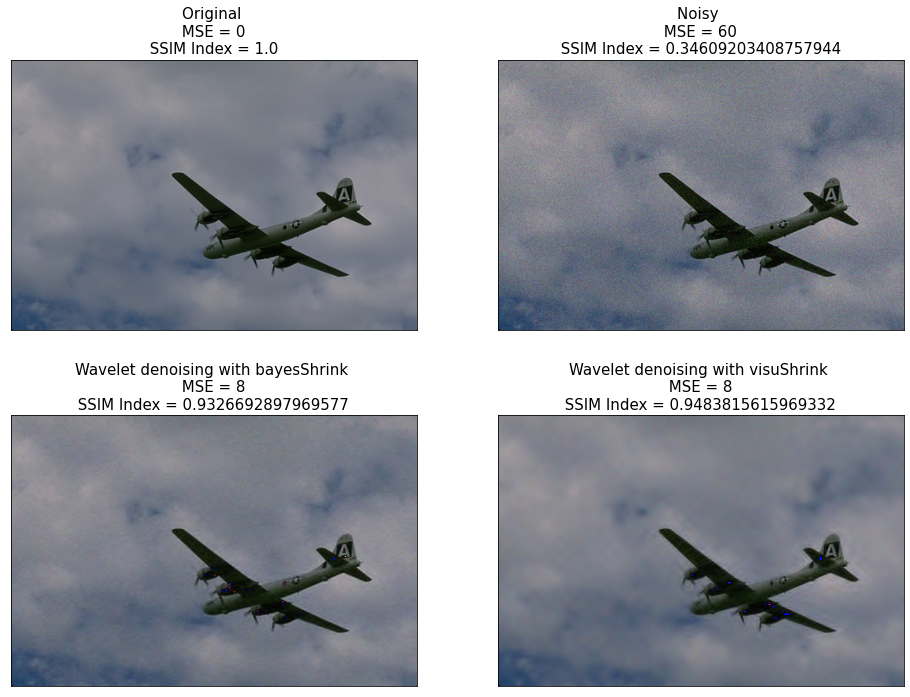

In [4]:
path = "images/original/"
level = "noisy10"
wavelet(path, level)

### Level 25 - Image denoising with Wavelet 

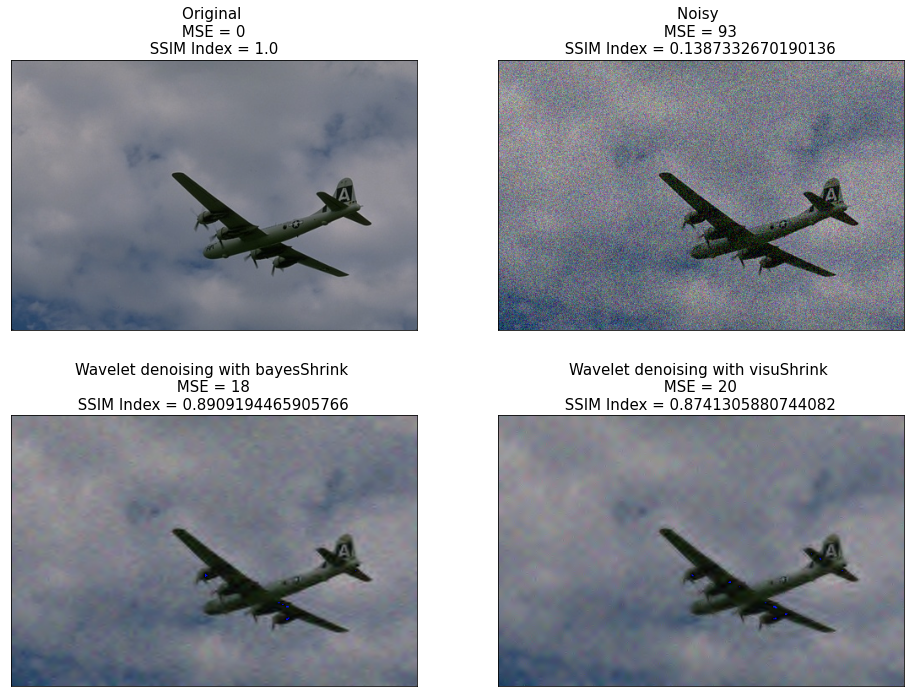

In [5]:
level = "noisy25"
wavelet(path, level)

### Level 50 - Image denoising with Wavelet 

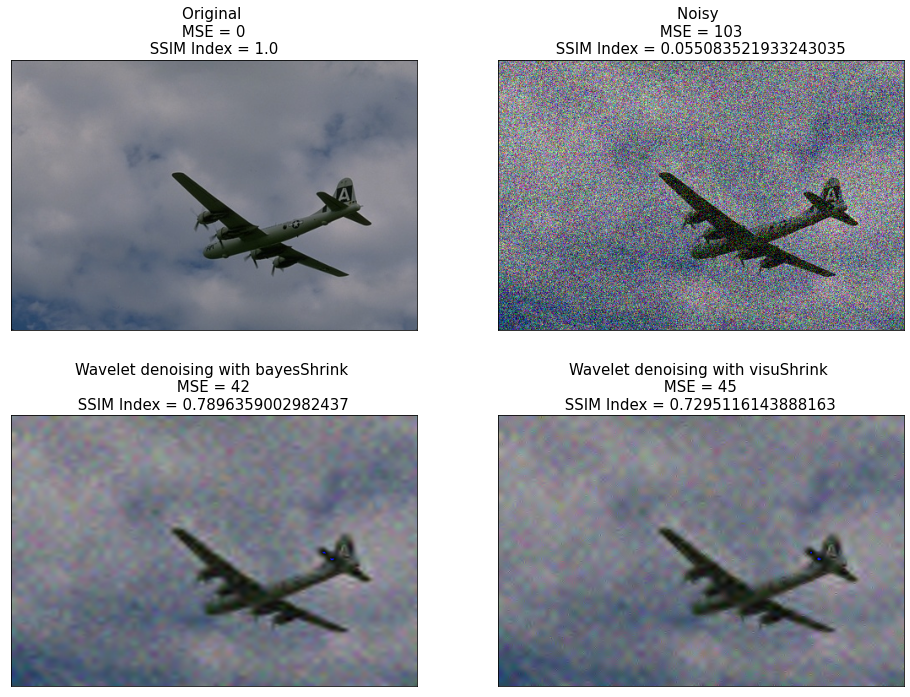

In [6]:
level = "noisy50"
wavelet(path, level)